<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and Train/Test Split

---

# Introduction

We've discussed overfitting in the context of bias and variance, and we've touched on some techniques that are used to avoid overfitting (but haven't practiced them yet). In this project, we'll practice a fundamental method for avoiding overfitting that is commonly referred to as: _train/test split validation_. 

This is similar to something called "cross-validation" — in fact, it is a type of cross-validation — in that we will be splitting the data into two subsets:
* A subset on which to train our model.
* A subset on which to test our model's predictions.

This serves two useful purposes:
* We prevent overfitting by not using all of the data.
* We have some remaining data we can use to evaluate our model.

While this may seem like a relatively simple idea, **there are some caveats** to putting it into practice. For example, if you are not careful, it is easy to take a non-random split. Suppose we have salary data on technical professionals that is composed of 80 percent data from California, 20 percent data from elsewhere, and is sorted by state. If we split our data into 80 percent training data and 20 percent testing data, we might inadvertantly select all the California data to train and all the non-California data to test. In this case, we've still overfit on our data set because we did not sufficiently randomize the data.

Note: In a situation like this, you could use a technique called _k-fold cross-validation_, which is cross-validation applied to more than two subsets. In particular, in k-fold cross-validation, you'd partition your data into $k$ subsets and train on $k-1$ one of them, holding the last slice for testing. You would do this for each of the possible $k-1$ subsets.

# Project Requirements

The goal of this project will be to create a test-training split to compare multiple models on the same Boston housing data set. For example, you might choose to compare different linear models on the same data.

In this project, you'll fit two to three different models on the Boston housing data. For example, you could pick two different subsets of variables, one or more polynomial models, or any other model you'd like. 

### Here's What We Will Be Doing:

* Work with Boston housing data to predict the value of a home
* Create a test-train split of the data.
* Train your model on the training data.
* Evaluate your model on the test data.
* Repeat with other variables.
* Rank the models by how well they score on the testing data set. 
* Don't forget to interpret your findings! 



A k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression

As a real estate developer, you are being asked to model the median home price of various houses in the city of Boston using data from the US census. Your goal is to predict a continuous, numeric output (price) based on a combination of discrete features that you choose.

In [143]:
import matplotlib.pyplot as plt

%matplotlib inline

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/Users/balkis/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

### REQUIRED: Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it _ought_ to be pretty clean, but you should always perform exploratory data analysis.

In [145]:
# Exploratory data analysis.
boston = pd.concat([y, X], axis=1)
boston.head()
# Include: total nulls, index, data types, shape, summary statistics, and the number of unique values for each column


,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [146]:
boston.index

RangeIndex(start=0, stop=506, step=1)

In [147]:
boston.columns

Index(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [148]:
boston.isnull().sum()

MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [149]:
boston.dtypes

MEDV       float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [150]:
boston.nunique()

MEDV       229
CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
dtype: int64

In [151]:
boston.shape

(506, 14)

In [152]:
boston.describe()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,9.197104,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Using `scikit-learn` Linear Regression

### REQUIRED: Pick 3-4 predictors (i.e. CRIM, ZN, etc...) that you will use to predict your target variable, MEDV.
Score and plot your predictions. What do these results tell us?

In [153]:
boston.corr()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000000,-0.388305,0.360445,-0.483725,0.175260,-0.427321,0.695360,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663
CRIM,-0.388305,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,0.360445,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,-0.483725,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,0.175260,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,-0.427321,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,0.695360,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,-0.376955,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,0.249929,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,-0.381626,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676


<AxesSubplot:>

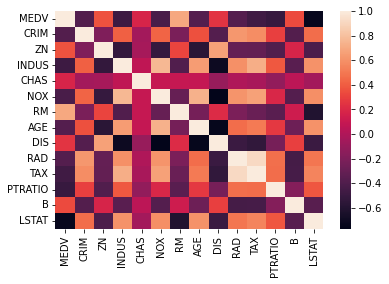

In [154]:
sns.heatmap(boston.corr())
#looks like CRIM, RAD, TAX, RM, PTRATIO, LSTAT, AGE, INDUS, NOX, RAD have strong r/s with MEDV

**My Observations**

Reviewing the correlation r/s between features 

- CRIM and RM have strong corr 
- INDUS and RAD/TAX have strong corr >> will use indus
- NOX and RAD/TAX have strong corr >> will use nox 
- INDUS and NOX >> use indus 
- RM and LSTAT >> use RM 
- DO NOT USE RAD AND TAX >> have strong R/S with each other and with other variables
- LSTAT and RM have strong r/s >> use RM for now 


In [159]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

36.45948838509015
[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
R-sqruare score:  0.7406426641094095
Adj R-square:  0.733789726372463
RMSE:  5.16923987247667


[('CRIM', -0.10801135783679423),
 ('ZN', 0.04642045836688117),
 ('INDUS', 0.020558626367069507),
 ('CHAS', 2.6867338193449415),
 ('NOX', -17.766611228299926),
 ('RM', 3.809865206809223),
 ('AGE', 0.0006922246403368467),
 ('DIS', -1.4755668456002524),
 ('RAD', 0.30604947898516904),
 ('TAX', -0.012334593916573685),
 ('PTRATIO', -0.9527472317072904),
 ('B', 0.009311683273793581),
 ('LSTAT', -0.5247583778554906)]

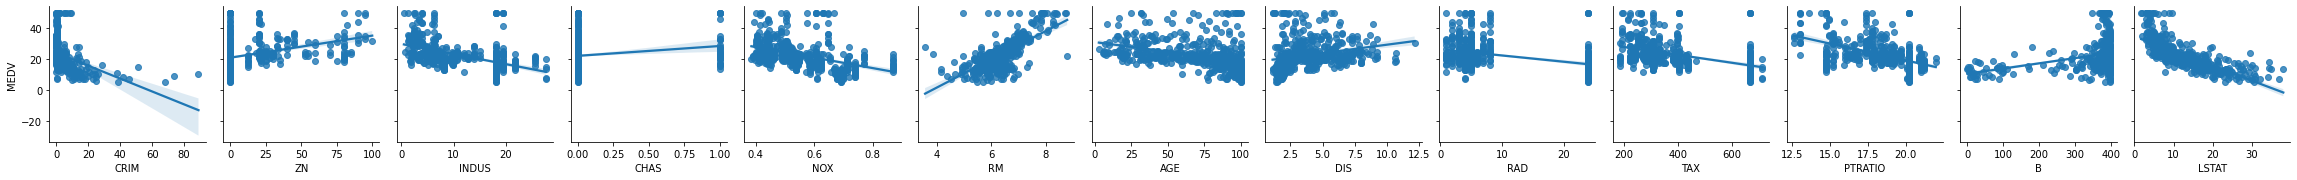

In [175]:
#Model 0 - Test model with all variables
feature_cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT']
k=len(feature_cols)
n=len(boston.MEDV)
sns.pairplot(boston, x_vars=feature_cols, y_vars='MEDV', kind='reg')

# Create X and y.
X = boston[feature_cols]
y = boston.MEDV

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)
print("R-sqruare score: ",linreg.score(X,y))
print("Adj R-square: ",1 - ((1-linreg.score(X,y))*(n-1))/(n-k-1))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, y_pred)))
list(zip(feature_cols, linreg.coef_))

1.5843447724293291
[-0.13794727  7.06286106 -1.04519697 -0.03810552]
R-sqruare score:  0.59386572880475
Adj R-square:  0.5906231398131712
RMSE:  5.16923987247667


[('INDUS', -0.13794727463663956),
 ('RM', 7.062861064074709),
 ('PTRATIO', -1.0451969661023617),
 ('AGE', -0.03810551575644683)]

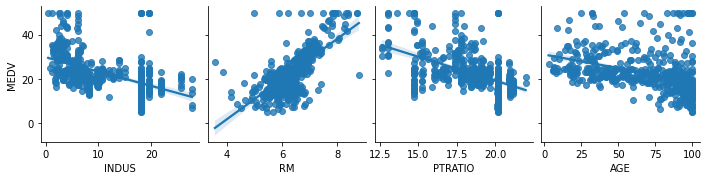

In [176]:
#Model 1 - starting with 4 features 
feature_cols = ['INDUS','RM','PTRATIO','AGE']
sns.pairplot(boston, x_vars=feature_cols, y_vars='MEDV', kind='reg')
k=len(feature_cols)
n=len(boston.MEDV)

# Create X and y.
X = boston[feature_cols]
y = boston.MEDV

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)
print("R-sqruare score: ",linreg.score(X,y))
print("Adj R-square: ",1 - ((1-linreg.score(X,y))*(n-1))/(n-k-1))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, y_pred)))
list(zip(feature_cols, linreg.coef_))

17.57368455618353
[-0.06862312 -0.01401809  4.44544306 -0.89898616  0.02001397 -0.58135814]
R-sqruare score:  0.6834733315847805
Adj R-square:  0.6796673997000284
RMSE:  5.16923987247667


[('CRIM', -0.06862312041973563),
 ('INDUS', -0.014018087327176396),
 ('RM', 4.445443059810299),
 ('PTRATIO', -0.8989861608473704),
 ('AGE', 0.020013965118874003),
 ('LSTAT', -0.5813581423244987)]

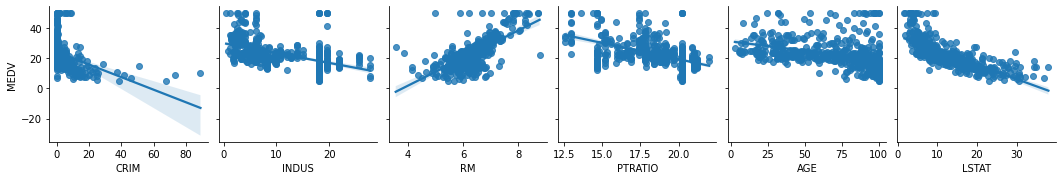

In [177]:
#Model 2 - addition of CRIM and LSTAT from model 1 
feature_cols = ['CRIM','INDUS','RM','PTRATIO','AGE','LSTAT']
sns.pairplot(boston, x_vars=feature_cols, y_vars='MEDV', kind='reg')
k=len(feature_cols)
n=len(boston.MEDV)

# Create X and y.
X = boston[feature_cols]
y = boston.MEDV

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)
print("R-sqruare score: ",linreg.score(X,y))
print("Adj R-square: ",1 - ((1-linreg.score(X,y))*(n-1))/(n-k-1))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, y_pred)))
list(zip(feature_cols, linreg.coef_))

17.56947628823078
[-0.06985872  4.46042975 -0.58364905 -0.904894    0.01850307]
R-sqruare score:  0.6834215770592026
Adj R-square:  0.6802557928297946
RMSE:  5.169662460285099


[('CRIM', -0.06985872065086253),
 ('RM', 4.460429745490094),
 ('LSTAT', -0.583649051405667),
 ('PTRATIO', -0.9048939972432538),
 ('AGE', 0.01850306615932372)]

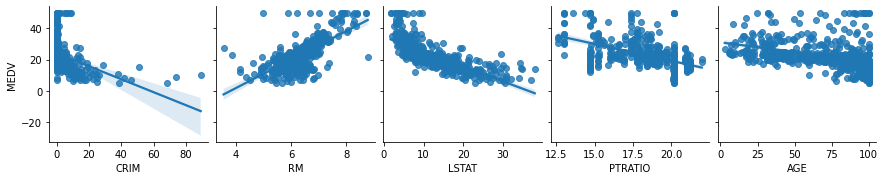

In [196]:
#Model 3 - removal of INDUS from model 2
feature_cols = ['CRIM','RM','LSTAT','PTRATIO','AGE']
sns.pairplot(boston, x_vars=feature_cols, y_vars='MEDV', kind='reg')
k=len(feature_cols)
n=len(boston.MEDV)

# Create X and y.
X = boston[feature_cols]
y = boston.MEDV

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)
print("R-sqruare score: ",linreg.score(X,y))
print("Adj R-square: ",1 - ((1-linreg.score(X,y))*(n-1))/(n-k-1))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, y_pred)))
list(zip(feature_cols, linreg.coef_))

19.24369502257522
[ 4.36784415 -0.61815064 -0.94678472  0.01653264]
R-sqruare score:  0.6801748227003213
Adj R-square:  0.6776213282707829
RMSE:  5.196104263311683


[('RM', 4.36784415428906),
 ('LSTAT', -0.6181506380889238),
 ('PTRATIO', -0.9467847244914916),
 ('AGE', 0.016532639776191738)]

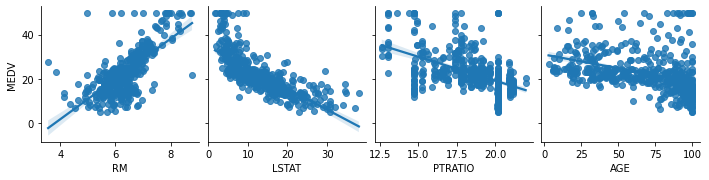

In [183]:
#Model 4 - removal of CRIM from model 3
feature_cols = ['RM','LSTAT','PTRATIO','AGE']
sns.pairplot(boston, x_vars=feature_cols, y_vars='MEDV', kind='reg')
k=len(feature_cols)
n=len(boston.MEDV)

# Create X and y.
X = boston[feature_cols]
y = boston.MEDV

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)
print("R-sqruare score: ",linreg.score(X,y))
print("Adj R-square: ",1 - ((1-linreg.score(X,y))*(n-1))/(n-k-1))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, y_pred)))
list(zip(feature_cols, linreg.coef_))

-0.5600795919465291
[ 7.1587613  -0.16534661 -0.99671639 -0.0423609 ]
R-sqruare score:  0.6083475301004221
Adj R-square:  0.6052205642728805
RMSE:  5.750054580296465


[('RM', 7.158761298663713),
 ('CRIM', -0.16534661301030715),
 ('PTRATIO', -0.9967163891390237),
 ('AGE', -0.042360904275889975)]

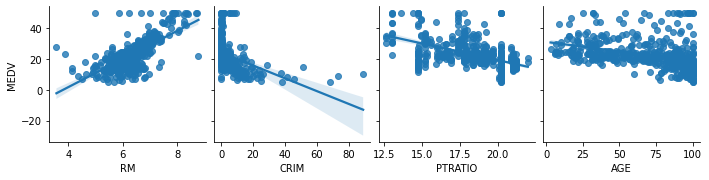

In [184]:
#Model 5 - removal of LSTAT from model 3 
feature_cols = ['RM','CRIM','PTRATIO','AGE']
sns.pairplot(boston, x_vars=feature_cols, y_vars='MEDV', kind='reg')
k=len(feature_cols)
n=len(boston.MEDV)

# Create X and y.
X = boston[feature_cols]
y = boston.MEDV

# Instantiate and fit.
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)

# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)
print("R-sqruare score: ",linreg.score(X,y))
print("Adj R-square: ",1 - ((1-linreg.score(X,y))*(n-1))/(n-k-1))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y, y_pred)))
list(zip(feature_cols, linreg.coef_))

**CONCLUSION**

After comparing 5 iterations of regression, the better model to use for our model is the 3rd model. Started with ['INDUS','RM','PTRATIO','AGE'], by adding CRIM and LSTAT, the adjusted R2 scroe increased, showing that CRIM and/or LSTAT make the model more accurate with the addition of these 2 features. Removal of INDUS helped to increase adjusted r2 further. Adjusted r2 score decreases again with the removal of CRIM or LSTAT. Model 3 is the most optimal from above (feature_cols = ['CRIM','RM','LSTAT','PTRATIO','AGE']), despite a small increase in RMSE from model 0/1/2. Removal of age or RM, increases RMSE significantly, and reduces Adj r2 value. 

### REQUIRED: Try 70/30 and 90/10 train/test splits: 70% of the data for training - 30% for testing, then 90% for training - 10% for testing.
Score and plot both of these approaches. How do your metrics change? What does this tell us about the size of training/testing splits? Include a written response.

In [197]:
from sklearn.model_selection import train_test_split

In [212]:
#creating null RMSE to compare against
feature_cols = ['CRIM','RM','LSTAT','PTRATIO','AGE']
X = boston[feature_cols]
y = boston.MEDV
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_train.mean())

print('Null RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_null)))
print('Null R-square score: ',linreg.score(X,y))

Null RMSE:  8.890778702747843
Null R-square score:  0.6834215770592026


In [199]:
def train_test_rmse(df, feature_cols,n_test):
    X = df[feature_cols]
    y = df.MEDV
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=n_test)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    print(feature_cols)
    print(linreg.coef_)
    
    y_pred = linreg.predict(X_test) 
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred)), linreg.score(X,y)

In [203]:
#70-30 train/test split
feature_cols = ['CRIM','RM','LSTAT','PTRATIO','AGE']
train_test_rmse(boston,feature_cols,0.3)

['CRIM', 'RM', 'LSTAT', 'PTRATIO', 'AGE']
[-0.04108162  3.47480333 -0.62254551 -0.92526236  0.01441039]


(4.960440797165829, 0.678877350742906)

In [204]:
#60-40 train/test split
feature_cols = ['CRIM','RM','LSTAT','PTRATIO','AGE']
train_test_rmse(boston,feature_cols,0.4)

['CRIM', 'RM', 'LSTAT', 'PTRATIO', 'AGE']
[-0.05585218  4.24875986 -0.56171869 -0.83927762  0.00825627]


(5.502799809210119, 0.6817765157233178)

In [205]:
#90-10 train/test split
feature_cols = ['CRIM','RM','LSTAT','PTRATIO','AGE']
train_test_rmse(boston,feature_cols,0.1)

['CRIM', 'RM', 'LSTAT', 'PTRATIO', 'AGE']
[-0.07457322  4.26577044 -0.5740122  -0.87281754  0.01419503]


(4.805241729858131, 0.682900766872482)

**Answer**

90/10 train-test split seems to have the optimal results from above, with the lowest RMSE scroe and highest r2 score, for the same dataset and features

## BONUS: Try the k-fold cross-validation technique described above, varying the number of folds from 5 to 10
What seems optimal? How do your scores change? What is the variance like? Try different folds to get a sense of how this impacts your score. What are the tradeoffs associated with choosing the number of folds? Include a written response.

In [206]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

feature_cols = ['CRIM','RM','LSTAT','PTRATIO','AGE']
X = boston[feature_cols]
y = boston.MEDV

In [207]:
#number of folds=5
kf = model_selection.KFold(n_splits=5, shuffle=False)
print('MSE: ',np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('RMSE: ',np.sqrt(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('R-square score: ',np.mean(cross_val_score(linreg, X, y, cv=kf, scoring='r2')))

MSE:  35.38115861268092
RMSE:  5.948206335752058
R-square score:  0.4143908304381834


In [208]:
#number of folds=6
kf = model_selection.KFold(n_splits=6, shuffle=False)
print('MSE: ',np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('RMSE: ',np.sqrt(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('R-square score: ',np.mean(cross_val_score(linreg, X, y, cv=kf)))

MSE:  43.995455335666385
RMSE:  6.6329070049011225
R-square score:  0.37738153860171386


In [209]:
#number of folds=7
kf = model_selection.KFold(n_splits=7, shuffle=False)
print('MSE: ',np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('RMSE: ',np.sqrt(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('R-square score: ',np.mean(cross_val_score(linreg, X, y, cv=kf)))

MSE:  44.70050299335322
RMSE:  6.685843476581935
R-square score:  0.35218105882855016


In [210]:
#number of folds=8
kf = model_selection.KFold(n_splits=8, shuffle=False)
print('MSE: ',np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('RMSE: ',np.sqrt(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('R-square score: ',np.mean(cross_val_score(linreg, X, y, cv=kf)))

MSE:  35.73502685224571
RMSE:  5.97787812289994
R-square score:  0.21970053762480127


In [211]:
#number of folds=9
kf = model_selection.KFold(n_splits=9, shuffle=False)
print('MSE: ',np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('RMSE: ',np.sqrt(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('R-square score: ',np.mean(cross_val_score(linreg, X, y, cv=kf)))

MSE:  34.22873433461551
RMSE:  5.850532824847281
R-square score:  0.3530148505169264


In [141]:
#number of folds=10
kf = model_selection.KFold(n_splits=10, shuffle=False)
print('RMSE: ',np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error')))
print('RMSE: ',np.sqrt(np.mean(-cross_val_score(linreg, X, y, cv=kf, scoring='neg_mean_squared_error'))))
print('R-square score: ',np.mean(cross_val_score(linreg, X, y, cv=kf)))

RMSE:  34.39256992554469
RMSE:  5.864517876649767
R-square score:  0.1806775107421703


**ANSWER:**

Upon review, both 5-fold and 9-fold cross validation yielded the lowest RMSE and MSE values, but the r2 score varied across folds. It seems that 5-fold is the optimal number of folds to use. increasing the number of folds, while reducing the RMSE, also reduces the r-square score of the model (with the exception of 9-fold model)

5-fold cross-validation preserves the r2 of the model, while showing to have one of the smallest RMSE and MSE values.

## BONUS
Practice the same workflow you just worked through above, but this time use Statsmodels instead of Sklearn for linear regression. See example formulas below.

### Example: Statsmodels Formulas

Adjust the formula using your chosen metrics from the housing data. Remember, your workflow here is the same, but the syntax is a little different. Describe your results. Are they comparable to scikit-learn's regression models?

In [8]:
# First, format your data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
# Set up your new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 29 Nov 2017   Prob (F-statistic):          1.59e-321
Time:                        22:28:38   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### BONUS:

Can you optimize your R2, selecting the best features? Provide your code and explain your process in a brief written response.

### BONUS:

Given a combination of predictors, can you identify another response variable that could be accurately predicted through the exploration of different predictors in this data set?

_Tip: Consider pairplots, coefficients, or Pearson scores._

In [10]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


## BONUS/DEMO: Up for an additional challenge? Try again, this time using the `patsy` library.

In [11]:
import patsy

# Add response to the core DataFrame
df['MEDV'] = y

In [12]:
from sklearn.model_selection import train_test_split  #Note: if you didn't import this earlier, you'll need to do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


In [13]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.5043486813354807
